# Name - Sagar Rajkumar Gupta 
#Batch - GRIPMARCH2023
#Task1- Predict the percentage of an student based on the no. of study hours. 

In [80]:
## importing the required library for performing the task 
import numpy as np
import pandas as pd
## library for vizualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


In [81]:
## creating dataframe with the help of csv file 
dataset=pd.read_csv('study_hour.csv')

In [82]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Inspection 

In [83]:
## printing the total row and column count 
dataset.shape

(25, 2)

In [84]:
dataset.info() ## this will give all the coulmns details means type of data, total value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [85]:
## printing numerical summary 
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Cleaning 

In [86]:
# checking for null values 
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

<Axes: xlabel='Hours'>

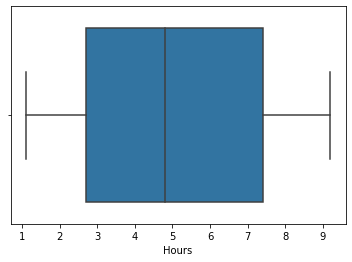

In [87]:
## Outlier detection -- 
sns.boxplot(x=dataset['Hours'])


<Axes: xlabel='Scores'>

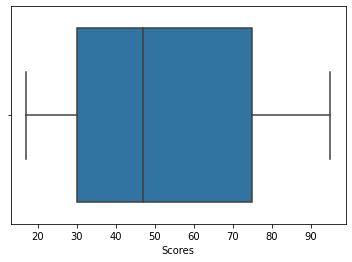

In [88]:
sns.boxplot(x=dataset['Scores'])

feedback - After seeing the boxplot, we can say that we don't have any outlier in the dataset

## Visualization 

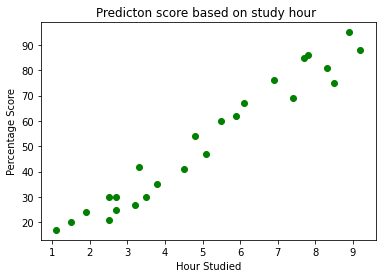

In [89]:
# let see what is the relation between hours and scores column using scatter plot 
plt.scatter(dataset['Hours'],dataset['Scores'],color='green')
plt.xlabel('Hour Studied')
plt.ylabel('Percentage Score')
plt.title('Predicton score based on study hour ')
plt.show()

<Axes: >

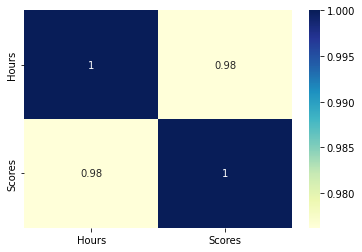

In [90]:
## let's see the correlation between  different cvariables 
sns.heatmap(dataset.corr(),annot=True,cmap="YlGnBu")

As is visible from the pairplot and the heatmap, the variable both variables  seems to be highly  correlated with each other . 

## Model Building  

**Performing simple linear regression-**
Equation of linear regression 

y=mx+c
- y = is the response or dependent variable 
- c = intercept 
- m = coefficient 


**Creating independent and dependent feature**

In [91]:
X=dataset.iloc[:,:-1].values # independent variable 
y=dataset.iloc[:,1].values # dependent variable 

**Splitting data intoo train and test formate**


In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

# Training The model

In [93]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

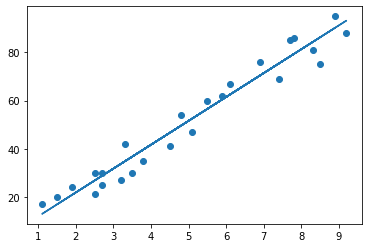

In [94]:
#plotting  the regression line and test data 
line=reg.coef_*X+reg.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()


# Making Prediction 

In [95]:
#  testing data - In Hours 
print(X_test)
#predicting the scores 
y_pred=reg.predict(X_test)
# comparing Actual vs predicted Scores
df=pd.DataFrame({'actual':y_test, 'Predicted':y_pred})
df.head()



[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [96]:
test_score=reg.score(X_test,y_test)
train_score=reg.score(X_train,y_train)
print('Traiin Score:',train_score)
print('Test Score: ',test_score)

Traiin Score: 0.9515510725211552
Test Score:  0.9454906892105354


In [97]:
# predicting with your own data 
hours=9.25
np_hour=np.array(hours)
pred=reg.predict(np_hour.reshape(1,-1))
print('Hour studied = {}'.format(hours))
print('Predicted Score={}'.format(pred[0]))

Hour studied = 9.25
Predicted Score=93.69173248737539


# Evaluating the model 

In [98]:
from sklearn import metrics 
print('Mean Absolute error : ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared  error : ',metrics.mean_squared_error(y_test,y_pred))
print('Mean Root Mean Squared  error : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error :  4.183859899002982
Mean Squared  error :  21.598769307217456
Mean Root Mean Squared  error :  4.647447612100373


# **Conclusion**

In this task we successfully created and implemented  a linear regression model to  predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

According to this linear regression model having an MAE of 4.18, MSE OF 21.598 AND RMSE of 4.64. The predicted percentage score of a student who studies 9.25 hours is 93.69%

